In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import TruncatedSVD

In [2]:
df=pd.read_csv('PBL 5 recommendation data.csv',encoding="iso-8859-1")

In [3]:
df.head()

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   
2                  NaN                NaN                   NaN   
3                  NaN                NaN                   NaN   
4                  NaN                NaN                   NaN   

   Customers.last_modified  Customers.customer_type  Orders.id  \
0               1437764306                      0.0       3758   
1               1437764354                      0.0         23   
2               1437764354                      0.0       9531   
3               1437762646                      0.0         29   
4               1437764316                      0.0         30   

   Orders.customer_id Orders.fname Orders.lname Orders.company  \
0                 797      Christy         Dill       Company0   
1                   3         John        Smith       Company1   
2                   3         John        Smith       Company1   
3                   4        James     Anderson            NaN   
4                   5      Abraham       Pollak       Company3   

  Orders.order_number  Orders.reorder_id Orders.external_source  \
0                3758                NaN                    NaN   
1                  23                NaN                    NaN   
2                9531                NaN                    NaN   
3                  29                NaN                   Ebay   
4                  30                NaN                    NaN   

   Orders.external_id Orders.currency  Orders.sales_rep  Orders.subtotal  \
0                 NaN             USD               NaN            57.20   
1                 NaN             USD               NaN            20.00   
2                 NaN             USD               NaN            68.78   
3                 NaN             USD               NaN            19.56   
4                 NaN             USD               NaN            36.05   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   
2         0.0             9.95               NaN                   NaN   
3         0.0             9.95               NaN                   NaN   
4         NaN             9.95               NaN                   NaN   

   Orders.gift_id  Orders.gift_amount Orders.fee_name  Orders.fee_amount  \
0             NaN                 NaN             NaN                NaN   
1             NaN                 NaN             NaN                NaN   
2             NaN                 NaN         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [5]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [6]:
df.describe()

Customers.id  Customers.create_date  Customers.status  \
count   4194.000000           4.194000e+03             101.0   
mean    1796.518121           1.440971e+09               0.0   
std     1065.679090           1.887681e+07               0.0   
min        3.000000           1.386089e+09               0.0   
25%      865.250000           1.427323e+09               0.0   
50%     1747.500000           1.446412e+09               0.0   
75%     2698.750000           1.456955e+09               0.0   
max     3736.000000           1.463418e+09               0.0   

       Customers.mailing  Customers.reminders  Customers.tax_exempt  \
count        2114.000000                  0.0              5.000000   
mean            0.979659                  NaN              0.200000   
std             0.141196                  NaN              0.447214   
min             0.000000                  NaN              0.000000   
25%             1.000000                  NaN              0.000000   
50%             1.000000                  NaN              0.000000   
75%             1.000000                  NaN              0.000000   
max             1.000000                  NaN              1.000000   

       Customers.account_id  Customers.sales_rep  Customers.rewards  \
count              3.000000                  0.0                0.0   
mean               7.333333                  NaN                NaN   
std                0.577350                  NaN                NaN   
min                7.000000                  NaN                NaN   
25%                7.000000                  NaN                NaN   
50%                7.000000                  NaN                NaN   
75%                7.500000                  NaN                NaN   
max                8.000000                  NaN                NaN   

       Customers.profile_id  Customers.last_modified  Customers.customer_type  \
count                   0.0             4.194000e+03              3771.000000   
mean                    NaN             1.450401e+09                 0.137364   
std                     NaN             1.021334e+07                 0.391842   
min                     NaN             1.437559e+09                 0.000000   
25%                     NaN             1.437763e+09                 0.000000   
50%                     NaN             1.456954e+09                 0.000000   
75%                     NaN             1.456956e+09                 0.000000   
max                     NaN             1.463418e+09                 2.000000   

          Orders.id  Orders.customer_id  Orders.reorder_id  \
count   4194.000000         4194.000000          82.000000   
mean    9142.984025         1796.518121        7389.158537   
std     5276.541078         1065.679090        3818.085460   
min       23.000000            3.000000          30.000000   
25%     4258.000000          865.250000        4537.250000   
50%     9641.000000         1747.500000        6887.000000   
75%    14011.750000         2698.750000       10832.000000   
max    17437.000000         3736.000000       16201.000000   

       Orders.external_id  Orders.sales_rep  Orders.subtotal   Orders.tax  \
count        5.000000e+00               0.0      4194.000000  3737.000000   
mean         6.018061e+08               NaN       131.925196     0.800838   
std          1.342831e+09               NaN       231.156869     4.859280   
min          6.638000e+01               NaN         2.890000     0.000000   
25%          1.698485e+06               NaN        36.750000     0.000000   
50%          1.698485e+06               NaN        74.740000     0.000000   
75%          1.698485e+06               NaN       139.960000     0.000000   
max          3.003935e+09               NaN      5163.040000   132.930000   

       Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
count      3999.000000        882.000000            882.000000   
mean          7.141263         20.4

In [7]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [8]:
df2=df.dropna(axis=1,how="any")
#Empty columns removed


In [9]:
df

Customers.id Customers.fname Customers.lname Customers.company  \
0              797         Christy            Dill          Company0   
1                3            John           Smith          Company1   
2                3            John           Smith          Company1   
3                4           James        Anderson               NaN   
4                5         Abraham          Pollak          Company3   
...            ...             ...             ...               ...   
4189          3730            Nora         Fontana               NaN   
4190          3732        Kennithe          Tecora               NaN   
4191          3733           Tinna         Randall               NaN   
4192          3735         HALIMAH          SHAHID               NaN   
4193          3736         Michael         Kiernan               NaN   

      Customers.create_date  Customers.status  Customers.mailing  \
0                1426018724               NaN                NaN   
1                1386089139               NaN                NaN   
2                1386089139               NaN                NaN   
3                1386780263               NaN                NaN   
4                1386861599               0.0                0.0   
...                     ...               ...                ...   
4189             1463408698               NaN                1.0   
4190             1463412756               NaN                NaN   
4191             1463413245               NaN                NaN   
4192             1463416687               NaN                1.0   
4193             1463418049               NaN                1.0   

      Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                     NaN                   NaN                   NaN   
1                     NaN                   NaN                   NaN   
2                     NaN                   NaN                   NaN   
3                     NaN                   NaN                   NaN   
4                     NaN                   NaN                   NaN   
...                   ...                   ...                   ...   
4189                  NaN                   NaN                   NaN   
4190                  NaN                   NaN                   NaN   
4191                  NaN                   NaN                   NaN   
4192                  NaN                   NaN                   NaN   
4193                  NaN                   NaN                   NaN   

      Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                     NaN                NaN                   NaN   
1                     NaN                NaN                   NaN   
2                     NaN                NaN                   NaN   
3                     NaN                NaN                   NaN   
4                     NaN                NaN                   NaN   
...                   ...                ...                   ...   
4189                  NaN                NaN                   NaN   
4190                  NaN                NaN                   NaN   
4191                  NaN                NaN                   NaN   
4192                  NaN                NaN                   NaN   
4193                  NaN                NaN                   NaN   

      Customers.last_modified  Customers.customer_type  Orders.id  \
0                  1437764306                      0.0       3758   
1                  1437764354                      0.0         23   
2                  1437764354                      0.0       9531   
3                  1437762646                      0.0         29   
4                  1437764316                      0.0         30   
...                       ...                      ...        ...   
4189               1463408698                      0.0      17421   
4190               1463412756                      NaN

In [10]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [11]:
#Some columns have been added again as they will be used in later stages
df2["Customers.company"]=df["Customers.company"]
df2["Products.shopping_brand"]=df["Products.shopping_brand"]
df2["Orders.payment_method"]=df["Orders.payment_method"]
df2["Full_Name"]=df["Customers.fname"]+" "+df["Customers.lname"]
df2["Orders.shipping_method"]=df["Orders.shipping_method"]

df.head(2)

Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   

   Customers.sales_rep  Customers.rewards  Customers.profile_id  \
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   

   Customers.last_modified  Customers.customer_type  Orders.id  \
0               1437764306                      0.0       3758   
1               1437764354                      0.0         23   

   Orders.customer_id Orders.fname Orders.lname Orders.company  \
0                 797      Christy         Dill       Company0   
1                   3         John        Smith       Company1   

  Orders.order_number  Orders.reorder_id Orders.external_source  \
0                3758                NaN                    NaN   
1                  23                NaN                    NaN   

   Orders.external_id Orders.currency  Orders.sales_rep  Orders.subtotal  \
0                 NaN             USD               NaN             57.2   
1                 NaN             USD               NaN             20.0   

   Orders.tax  Orders.shipping  Orders.coupon_id  Orders.coupon_amount  \
0         0.0             9.95              13.0                  2.86   
1         NaN             9.99               NaN                   NaN   

   Orders.gift_id  Orders.gift_amount Orders.fee_name  Orders.fee_amount  \
0             NaN                 NaN             NaN                NaN   
1             NaN                 NaN             NaN                NaN   

  Orders.discount_name  Orders.discount_amount  Orders.total  \
0                  NaN                     NaN         64.29   
1                  NaN                     NaN         29.99   

   Orders.balance_due Orders.shipping_carrier Orders.shipping_method  \
0                 NaN                   fedex              11|Ground   
1                 NaN                   fedex              11|Ground   

   Orders.shipping_trans  Orders.shipping_flags  Orders.weight  \
0                    NaN                    NaN            NaN   
1                    NaN                    NaN            NaN   

  Orders.tracking  Orders.payment_status  Orders.payment_date  \
0      5.7204E+14                    3.0         1.426019e+09   
1     1.28597E+14                    3.0         1.386090e+09   

  Orders.payment_user Orders.payment_type Orders.payment_method  \
0                 NaN       authorize.net                   NaN   
1                 NaN       authorize.net                   NaN   

   Orders.payment_amount  Orders.purchase_order Orders.payment_id  \
0                  64.29                    NaN        6993607863   
1                  29.99                    NaN                 0   

  Orders.payment_code  Orders.payment_ref  Orders.status  Orders.placed_date  \
0              510142                 NaN              1          1426019099   
1                   0                 NaN              1          1386090455   

   Orders.updated_date  Orders.shipped_date Orders.comments  \
0         1.438868e+09         1.426101e+09             NaN   
1         1.440529e+09         1.386103e+09             NaN   

           Orders.notes  Orders.registry_id  Orders.gift_message  \
0  Insured By Eye4Fraud                 NaN                  NaN   
1                   NaN                 NaN                  NaN   

   Orders.website  Orders.mailing  Orders.flags  Order

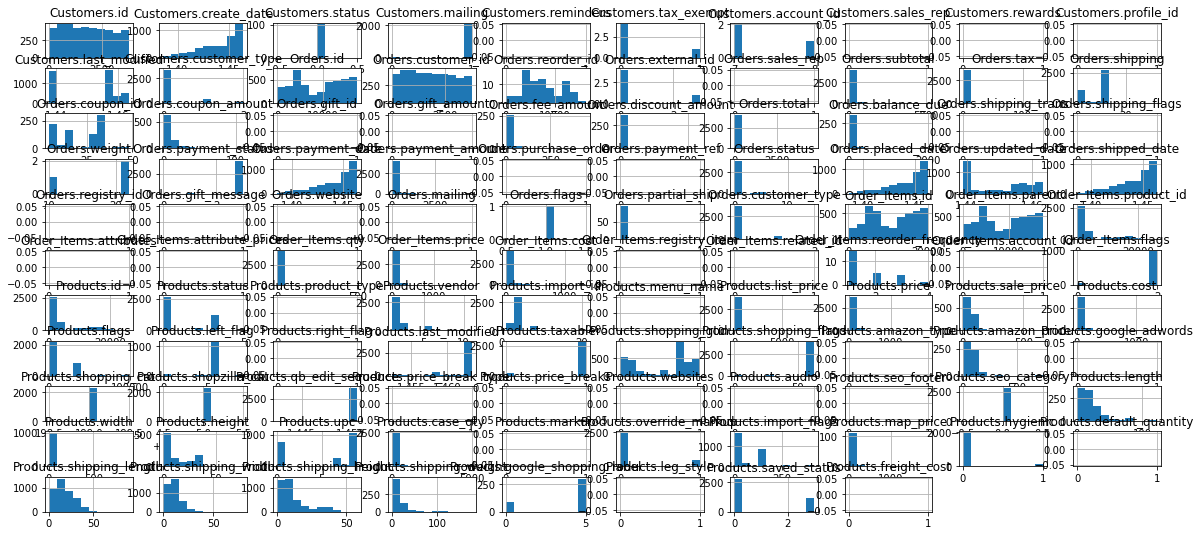

In [12]:
df.hist(figsize=(20,9));

### Most Popular Product

In [13]:
def the_most_popular(column_name,ranking="total"): # the_most_popular adında oluşturduğumuz fonksiyon içerisinde ilgili alanların toplam sayıları veya toplam harcanan
                                                    #miktarlarının ayrı ayrı sıralanması için ranking işlemi uygula gruplama yapılmıştır
    grouped=df2.groupby(column_name).agg({
        "Order_Items.qty":[np.size,np.sum,np.mean],
        "Order_Items.price":[np.mean]})
    grouped["Total_Amount"]=grouped["Order_Items.qty"]["sum"]*grouped["Order_Items.price"]["mean"]
    if ranking=="sum":
        return grouped.sort_values(("Order_Items.qty","sum"),ascending=False).head(5)
    else:
        return grouped.sort_values(("Total_Amount"),ascending=False).head(5)

The most popular product according to the amount of sales

In [14]:
the_most_popular("Order_Items.product_name","sum")

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Sanitary Pads with Adhesive & Wings                              2  133   

                                                                \
                                                          mean   
Order_Items.product_name                                         
TruTemp                                             500.000000   
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Sanitary Pads with Adhesive & Wings                  66.500000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
TruTemp                                                     2.990000   
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Sanitary Pads with Adhesive & Wings                        42.320000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
TruTemp                                              1495.000000  
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Sanitary Pads with Adhesive & Wings                  5628.560000

The most popular product according to the total money spent

In [15]:
the_most_popular("Order_Items.product_name") 


Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
Disposable Emergency Blanket, Gray, Not Applicable              14  305   
Medline MoliCare Super Plus Disposable Adult Di...              53  164   
Medline Deluxe Aluminum Transport Chair With Ha...              46   47   
Sanitary Pads with Adhesive & Wings                              2  133   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   

                                                                \
                                                          mean   
Order_Items.product_name                                         
Disposable Emergency Blanket, Gray, Not Applicable   21.785714   
Medline MoliCare Super Plus Disposable Adult Di...    3.094340   
Medline Deluxe Aluminum Transport Chair With Ha...    1.021739   
Sanitary Pads with Adhesive & Wings                  66.500000   
2-Ply Tissue/Poly Professional Towels, White, N...  110.000000   

                                                   Order_Items.price  \
                                                                mean   
Order_Items.product_name                                               
Disposable Emergency Blanket, Gray, Not Applicable         34.610000   
Medline MoliCare Super Plus Disposable Adult Di...         54.760377   
Medline Deluxe Aluminum Transport Chair With Ha...        126.620870   
Sanitary Pads with Adhesive & Wings                        42.320000   
2-Ply Tissue/Poly Professional Towels, White, N...         25.270000   

                                                    Total_Amount  
                                                                  
Order_Items.product_name                                          
Disposable Emergency Blanket, Gray, Not Applicable  10556.050000  
Medline MoliCare Super Plus Disposable Adult Di...   8980.701887  
Medline Deluxe Aluminum Transport Chair With Ha...   5951.180870  
Sanitary Pads with Adhesive & Wings                  5628.560000  
2-Ply Tissue/Poly Professional Towels, White, N...   5559.400000

Most popular firm by number of purchases

In [16]:
the_most_popular("Customers.company","sum")

Order_Items.qty                 Order_Items.price  \
                             size  sum       mean              mean   
Customers.company                                                     
Company59                      15  381  25.400000         34.610000   
Company343                      2  133  66.500000         42.320000   
Company86                      11  105   9.545455         18.400000   
Company130                     17   71   4.176471         28.382353   
Company171                     12   47   3.916667         31.941667   

                   Total_Amount  
                                 
Customers.company                
Company59          13186.410000  
Company343          5628.560000  
Company86           1932.000000  
Company130          2015.147059  
Company171          1501.258333

Most popular firm by spending amount

In [17]:
the_most_popular("Customers.company","total")

Order_Items.qty                 Order_Items.price  \
                             size  sum       mean              mean   
Customers.company                                                     
Company59                      15  381  25.400000         34.610000   
Company343                      2  133  66.500000         42.320000   
Company17                       2   27  13.500000        177.190000   
Company159                     11   47   4.272727         80.058182   
Company281                      4   43  10.750000         62.910000   

                   Total_Amount  
                                 
Customers.company                
Company59          13186.410000  
Company343          5628.560000  
Company17           4784.130000  
Company159          3762.734545  
Company281          2705.130000

Top shopping customer

In [18]:
the_most_popular("Full_Name","sum")

Order_Items.qty                  Order_Items.price  \
                                      size  sum        mean              mean   
Full_Name                                                                       
United promotion promotion               2  505  252.500000            68.425   
RoseAnn Reyes                           10  300   30.000000            34.610   
David Oconnell                           2  220  110.000000            25.270   
Burten  Leibowitz                        2  133   66.500000            42.320   
Eleni Ventsanos                         11  105    9.545455            18.400   

                           Total_Amount  
                                         
Full_Name                                
United promotion promotion    34554.625  
RoseAnn Reyes                 10383.000  
David Oconnell                 5559.400  
Burten  Leibowitz              5628.560  
Eleni Ventsanos                1932.000

Customer who spends the most money

In [19]:
the_most_popular("Full_Name","total")

Order_Items.qty             Order_Items.price  \
                                      size  sum   mean              mean   
Full_Name                                                                  
United promotion promotion               2  505  252.5            68.425   
RoseAnn Reyes                           10  300   30.0            34.610   
Burten  Leibowitz                        2  133   66.5            42.320   
David Oconnell                           2  220  110.0            25.270   
Lalith Paulus                            2   27   13.5           177.190   

                           Total_Amount  
                                         
Full_Name                                
United promotion promotion    34554.625  
RoseAnn Reyes                 10383.000  
Burten  Leibowitz              5628.560  
David Oconnell                 5559.400  
Lalith Paulus                  4784.130

Most shopped brand

In [20]:
the_most_popular("Products.shopping_brand","sum")

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
CanDo&reg;                               113   182  1.610619   
Fabrication Enterprises Inc.              85   112  1.317647   

                             Order_Items.price   Total_Amount  
                                          mean                 
Products.shopping_brand                                        
MEDLINE                              59.674308  294731.405408  
Drive Medical                       120.378224   68254.453178  
HARTMANN-CONCO INC                   58.843525   19065.301967  
CanDo&reg;                           30.438761    5539.854513  
Fabrication Enterprises Inc.         49.979882    5597.746824

Top paid brand

In [21]:
the_most_popular("Products.shopping_brand","total")

Order_Items.qty                  \
                                        size   sum      mean   
Products.shopping_brand                                        
MEDLINE                                 2672  4939  1.848428   
Drive Medical                            535   567  1.059813   
HARTMANN-CONCO INC                       122   324  2.655738   
Wenzelite                                 36    48  1.333333   
Fabrication Enterprises Inc.              85   112  1.317647   

                             Order_Items.price   Total_Amount  
                                          mean                 
Products.shopping_brand                                        
MEDLINE                              59.674308  294731.405408  
Drive Medical                       120.378224   68254.453178  
HARTMANN-CONCO INC                   58.843525   19065.301967  
Wenzelite                           179.534722    8617.666667  
Fabrication Enterprises Inc.         49.979882    5597.746824

Top paid area

In [22]:
the_most_popular("Orders.payment_method","total")

Order_Items.qty                Order_Items.price  \
                                 size  sum      mean              mean   
Orders.payment_method                                                    
Credit Card                       373  525  1.407507         86.151340   
PayPal                            318  510  1.603774         49.338113   
Check                              29   66  2.275862         81.778276   
Cash                                2    3  1.500000        115.980000   

                       Total_Amount  
                                     
Orders.payment_method                
Credit Card            45229.453753  
PayPal                 25162.437736  
Check                   5397.366207  
Cash                     347.940000

Cargo types and total prices of transported goods

In [23]:
the_most_popular("Orders.shipping_method","sum")

Order_Items.qty                   Order_Items.price  \
                                    size   sum        mean              mean   
Orders.shipping_method                                                         
11|Ground                           2474  4446    1.797090         62.332078   
0|Standard Shipping                  902  1188    1.317073         63.942938   
-1|Free Shipping                     267  1085    4.063670        125.706742   
SOUTHWESTERN MOTOR TRNAS               1   200  200.000000         25.270000   
0|Free Shipping                       91    97    1.065934        142.716044   

                           Total_Amount  
                                         
Orders.shipping_method                   
11|Ground                 277128.417041  
0|Standard Shipping        75964.210244  
-1|Free Shipping          136391.814607  
SOUTHWESTERN MOTOR TRNAS    5054.000000  
0|Free Shipping            13843.456264

## Build a popularity based recommender system

In [24]:
product_recommend=df2.pivot_table(index="Orders.customer_id",columns='Order_Items.product_name',values='Order_Items.qty').fillna(0)
product_recommend

Order_Items.product_name   BUCKET, REPLACEMENT FOR MDS89668XW  \
Orders.customer_id                                              
3                                                         0.0   
4                                                         0.0   
5                                                         0.0   
7                                                         0.0   
8                                                         0.0   
...                                                       ...   
3730                                                      0.0   
3732                                                      0.0   
3733                                                      0.0   
3735                                                      0.0   
3736                                                      0.0   

Order_Items.product_name  1 Box Of Medline Commode Liners with Absorbent Pad  \
Orders.customer_id                                                             
3                                                                       0.0    
4                                                                       0.0    
5                                                                       0.0    
7                                                                       0.0    
8                                                                       0.0    
...                                                                     ...    
3730                                                                    0.0    
3732                                                                    0.0    
3733                                                                    0.0    
3735                                                                    0.0    
3736                                                                    0.0    

Order_Items.product_name  1 Pad of CURAD Mediplast Wart Pad  \
Orders.customer_id                                            
3                                                       0.0   
4                                                       0.0   
5                                                       0.0   
7                                                       0.0   
8                                                       0.0   
...                                                     ...   
3730                                                    0.0   
3732                                                    0.0   
3733                                                    0.0   
3735                                                    0.0   
3736                                                    0.0   

Order_Items.product_name  1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large  \
Orders.customer_id                                                                          
3                                                                       0.0                 
4                                                                       0.0                 
5                                                                       0.0                 
7                                                                       0.0                 
8                                                                       0.0                 
...                                                                     ...                 
3730                                                                    0.0                 
3732                                                                    0.0                 
3733                                                                    0.0                 
3735                                                                    0.0                 
3736                                                                    0.0                 

Order_Items.product_name  1/2" self-adhesive hook material, 25 yard dispenser box, 

In [25]:
# If the transaction is made on the most sold product: TruTemp
product_TruTemp=product_recommend["TruTemp"]
product_TruTemp.head()

Orders.customer_id
3    0.0
4    0.0
5    0.0
7    0.0
8    0.0
Name: TruTemp, dtype: float64

In [26]:
product_recommend[["TruTemp","Disposable Emergency Blanket, Gray, Not Applicable"]].corr()

Order_Items.product_name                             TruTemp  \
Order_Items.product_name                                       
TruTemp                                             1.000000   
Disposable Emergency Blanket, Gray, Not Applicable -0.000545   

Order_Items.product_name                            Disposable Emergency Blanket, Gray, Not Applicable  
Order_Items.product_name                                                                                
TruTemp                                                                                     -0.000545   
Disposable Emergency Blanket, Gray, Not Applicable                                           1.000000

In [27]:
product_recommend[["TruTemp","2-Ply Tissue/Poly Professional Towels, White, Not Applicable"]].corr()

Order_Items.product_name                             TruTemp  \
Order_Items.product_name                                       
TruTemp                                             1.000000   
2-Ply Tissue/Poly Professional Towels, White, N... -0.000328   

Order_Items.product_name                            2-Ply Tissue/Poly Professional Towels, White, Not Applicable  
Order_Items.product_name                                                                                          
TruTemp                                                                                     -0.000328             
2-Ply Tissue/Poly Professional Towels, White, N...                                           1.000000

In [28]:
truTemp_df=pd.DataFrame()
truTemp_df["product"]=product_recommend.corrwith(product_TruTemp).index
truTemp_df["correlasion"]=product_recommend.corrwith(product_TruTemp).values
truTemp_df.sort_values(("correlasion"),ascending=False)

product  correlasion
1675                                            TruTemp     1.000000
1197        Phlebotomy Sharps Containers, Red, 1.000 QT     0.707028
1273  Protection Plus Overnight Protective Underwear...    -0.000328
596      Enteral Feeding and Irrigation Syringes, 60.00    -0.000328
1022       Medline MSC327100 Capri Bladder Control Pads    -0.000328
...                                                 ...          ...
953            Medline Emesis/Barf Bags, Blue - 24 Pack    -0.001561
1266               Protection Plus Disposable Underpads    -0.001577
838                     K1 Basic Extra-Wide Wheelchairs    -0.001900
954   Medline Emesis/Barf Bags, throw up bags, Blue ...    -0.002066
948   Medline Deluxe Aluminum Transport Chair With H...    -0.002215

[1821 rows x 2 columns]

### Cosine similarity for product description

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
sparse_matrix=vect.fit_transform(df)

In [30]:
sparse_matrix

<181x167 sparse matrix of type '<class 'numpy.int64'>'
	with 362 stored elements in Compressed Sparse Row format>

In [31]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,columns=vect.get_feature_names_out())


In [32]:
doc_term_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
df

account_id  amazon_asin  amazon_item_type  amazon_price  amazon_type  \
0             0            0                 0             0            0   
1             0            0                 0             0            0   
2             0            0                 0             0            0   
3             0            0                 0             0            0   
4             0            0                 0             0            0   
5             0            0                 0             0            0   
6             0            0                 0             0            0   
7             0            0                 0             0            0   
8             0            0                 0             0            0   
9             1            0                 0             0            0   
10            0            0                 0             0            0   
11            0            0                 0             0            0   
12            0            0                 0             0            0   
13            0            0                 0             0            0   
14            0            0                 0             0            0   
15            0            0                 0             0            0   
16            0            0                 0             0            0   
17            0            0                 0             0            0   
18            0            0                 0             0            0   
19            0            0                 0             0            0   
20            0            0                 0             0            0   
21            0            0                 0             0            0   
22            0            0                 0             0            0   
23            0            0                 0             0            0   
24            0            0                 0             0            0   
25            0            0                 0             0            0   
26            0            0                 0             0            0   
27            0            0                 0             0            0   
28            0            0                 0             0            0   
29            0            0                 0             0            0   
30            0            0                 0             0            0   
31            0            0                 0             0            0   
32            0            0                 0             0            0   
33            0            0                 0             0            0   
34            0            0                 0             0            0   
35            0            0                 0             0            0   
36            0            0                 0             0            0   
37            0            0                 0             0            0   
38            0            0                 0             0            0   
39            0            0                 0             0            0   
40            0            0                 0             0            0   
41            0            0                 0             0            0   
42            0            0                 0             0            0   
43            0            0                 0             0            0   
44            0            0                 0             0            0   
45            0            0                 0             0            0   
46            0            0                 0             0            0   
47            0            0                 0             0            0   
48            0            0                 0             0            0   
49            0            0                 0             0            0   
50            0            0                 0             0            0   
5

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
pd.DataFrame(cosine_similarity(df,df))

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0    1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
1    0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
2    0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
3    0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
4    0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
5    0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
6    0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
7    0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5  0.5   
8    0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5  0.5   
9    0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5  0.5   
10   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5  0.5   
11   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5  0.5   
12   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  0.5   
13   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0   
14   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
15   0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17   0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18   0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19   0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
20   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
22   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
23   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
24   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0   
26   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
27   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
29   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
30   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
31   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
34   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
35   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
36   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
37   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
38   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
40   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
41   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
42   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
43   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
44   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
45   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
46   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
47   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
48   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
49   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
50   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5